### FEATURE ENGINEERING

In [1]:
# Import Packages and Dependencies
import datetime
import pandas as pd
import numpy as np
import pickle

#packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display plots in jupyter notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #to fix blurry text on plots

#set default theme for plotting
sns.set_context("notebook")
sns.set_style("darkgrid")
sns.set(color_codes=True)

#set max number of columns to be displayed
pd.set_option('display.max_columns', 50)

In [4]:
#Loading Data
train= pd.read_pickle("../Task 2/processed_data/train_data.pkl")
history_data= pd.read_pickle('../Task 2/processed_data/history_data.pkl')

In [5]:
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2013-06-15,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [6]:
history_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### 1. Feature Engineering

when training our model we cannot use `string` data and need to encode it into numerical data. One way to do it is by mapping each category to an integer (label encoding) but this will not work because the model will understand the data to be in some kind of hierarchy.

For that reason we will use a method with `dummy variable`.

**Tranforming Categorical data**
    1. Channel_Sales
    We will add dummy variables and transform it into boolean category to determine whether an entry belongs to that category or not

In [7]:
#First need to replace all missing values with a categorical value

train['channel_sales'] = train['channel_sales'].fillna('no_channel')

In [8]:
#transform channel_sales into categorical data type
train['channel_sales'] = train['channel_sales'].astype('category')

In [9]:
#display the categories in channe_sales

train['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7376
no_channel                          4217
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

there are 8 different categories. We will convert them to 8 different columns by adding dummy variables and then remove the null value category

In [10]:
#create dummy variables
categories_channel_sales = pd.get_dummies(train['channel_sales'], prefix='channel')

#rename columns
categories_channel_sales.columns = [col_name[:11] for col_name in categories_channel_sales.columns]

In [11]:
categories_channel_sales.head()

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_no_,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [12]:
#drop null values column
categories_channel_sales.drop(columns=['channel_no_'], inplace=True)

2. Activity

In [13]:
#replace the null values with 'no_activity'
train['activity_new'] = train['activity_new'].fillna('no_activity')

In [14]:
train['activity_new'].value_counts()

no_activity                         9545
apdekpcbwosbxepsfxclislboipuxpop    1577
kkklcdamwfafdcfwofuscwfwadblfmce     422
kwuslieomapmswolewpobpplkaooaaew     230
fmwdwsxillemwbbwelxsampiuwwpcdcb     219
                                    ... 
exespdalufcdobebbdlcbmbficidkolw       1
ubmsiuoxiaiukxlcfflklluolpeuxaas       1
ikiucmkuisupefxcxfxxulkpwssppfuo       1
xbwipkcuemuidpumuiomukkicculdmsb       1
upssicikedpwsfusuofwdxiopiuluubp       1
Name: activity_new, Length: 420, dtype: int64

There are a lot of activities with very few companies. So we will replace the any category **less than 75 samples** as no_acitivity category

In [15]:
categories_activity = pd.DataFrame({'Samples': train['activity_new'].value_counts()})

In [16]:
#filter categories with less than 75 samples
filter_samples = list(categories_activity[categories_activity['Samples']<=75].index)

#replace filtered by 'no_activity' category
train['activity_new'] = train['activity_new'].replace(filter_samples, 'no_activity')

In [17]:
#create dummy variables
categories_activity = pd.get_dummies(train['activity_new'], prefix='activity')

#rename columns
categories_activity.columns = [col_name[:12] for col_name in categories_activity.columns]

categories_activity.head()

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_no_,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [18]:
#drop null values column
categories_activity.drop(columns=['activity_no_'], inplace=True)

3. Origin_up

In [19]:
#replace the null values with 'no_origin'
train['origin_up'] = train['origin_up'].fillna('no_origin')

#display categories
train['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7823
kamkkxfxxuwbdslkwifmmcsiusiuosws    4517
ldkssxwpmemidmecebumciepifcamkci    3664
no_origin                             87
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [21]:
#create dummy variables
categories_origin = pd.get_dummies(train['origin_up'], prefix='origin')

#rename columns
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

categories_origin.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_no_,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [22]:
#drop column
categories_origin.drop(columns='origin_no_', inplace=True)

categories_origin.head(3)

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0


In [23]:
#Merge Dummy variables to the main Dataframe

train = pd.merge(train, categories_channel_sales, left_index= True, right_index=True)
train = pd.merge(train, categories_activity, left_index= True, right_index= True)
train = pd.merge(train, categories_origin, left_index= True, right_index= True)

In [24]:
# drop original 'activity_new','channel_sales', 'origin_up' columns
train.drop(columns= ['activity_new','channel_sales', 'origin_up'], inplace= True)

4. Transform Boolean data in `has_gas`

In [25]:
# we will replace t for True or 1 and f for False or 0-- onehot encoding
train["has_gas"]=train["has_gas"].replace(["t", "f"],[1,0])

**New Feature**
Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year to our model

In [26]:
mean_year = history_data.groupby(['id']).mean().reset_index()
mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [27]:
# combine the columns to get the total cost

mean_year = mean_year.rename(index=str, columns= {"price_p1_var":'mean_year_price_p1_var',
                                                 "price_p2_var": "mean_year_price_p2_var", 
                                                 "price_p3_var": "mean_year_price_p3_var", 
                                                 "price_p1_fix": "mean_year_price_p1_fix",
                                                 "price_p2_fix": "mean_year_price_p2_fix",
                                                 "price_p3_fix": "mean_year_price_p3_fix"})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [28]:
#assigning new feature to a variable
features= mean_year
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


Earlier we explored the data and did analysis on churn rates by dates. That data exploration did not provide us with much insights.

We will define a new variable `tenure` to get more insights into churn rates

`tenure = date_end - date_activ`

In [29]:
#add 'tenure' as a new column in dataframe
train['tenure'] = ((train['date_end']- train['date_activ'])/ np.timedelta64(1, "Y")).astype(int)

In [30]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].\
                count().\
                unstack(level=1) 

tenure

churn,0,1
tenure,,
0,1.0,NaN
2,261.0,40.0
3,1178.0,193.0
4,3632.0,535.0
5,3009.0,297.0
6,3052.0,269.0
7,2649.0,210.0
8,162.0,11.0
9,94.0,2.0


In [31]:
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

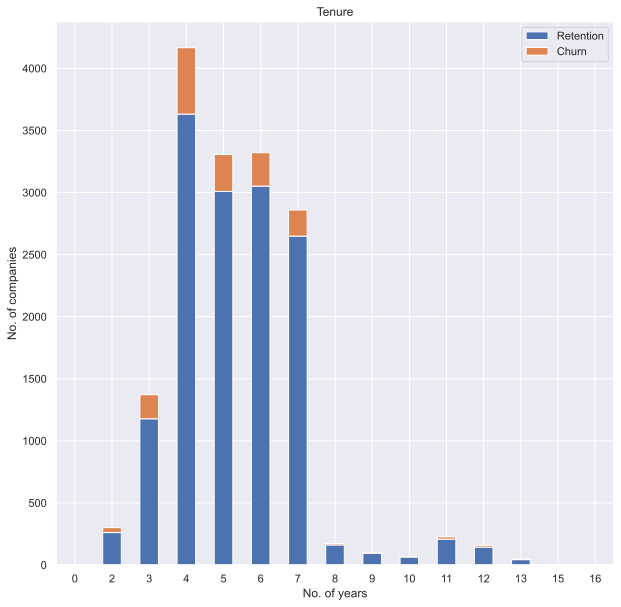

In [32]:
#plot churn as function on tenure
tenure.plot(kind="bar", rot=0,
            figsize=(10,10),
            stacked=True,
            title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right") 

# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")

plt.show()

Churn rate is low for customers which are new or are recent subscribers and long term customers (> 7 years).

Churn rate is highest for customers in the range of 3 to 7 years of subscription.



* We have the data till 2015. We will transform dates with respect to a reference date (Jan. 2016) to get more insights:
> `months_active` : No. of months active until reference date (Jan. 2016) <br>
> `months_to_end` : No. of months of the contract left at reference date (Jan. 2016) <br>
> `months_modif_prod`: No. of months since last modification at reference date (Jan. 2016)

* To create the month column we will follow the below steps:
    1. Substract the reference date and column date
    2. Convert timedelta in months
    3. convert to integer

In [33]:
#define function to get the number of months

def get_months(reference_date, dataframe, column):
    """
    Input a column with timedelta nad return months
    """
    time_delta = REFERENCE_DATE - dataframe[column]
    months = (time_delta/np.timedelta64(1,"M")).astype(int)
    
    return months

In [34]:
# create a reference date
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [35]:
train['months_activ'] = get_months(REFERENCE_DATE, train, 'date_activ')
train["months_to_end"] = -get_months(REFERENCE_DATE, train, "date_end") 
train["months_modif_prod"] = get_months(REFERENCE_DATE, train, "date_modif_prod")

In [36]:
def plot_churn_by_month(dataframe, column, fontsize_=11): 
    """
    Plot churn distribution by monthly variable
    """
    temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].\
                                                count().\
                                                unstack(level=1) 
    
    temp.plot(kind="bar", figsize=(12,10), stacked=True, rot=0,title= column)
    
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    
    # Labels
    plt.ylabel("No. of companies")
    plt.xlabel("No. of months")
    
    # Set xlabel fontsize
    plt.xticks(fontsize=fontsize_) 
    
    plt.show()

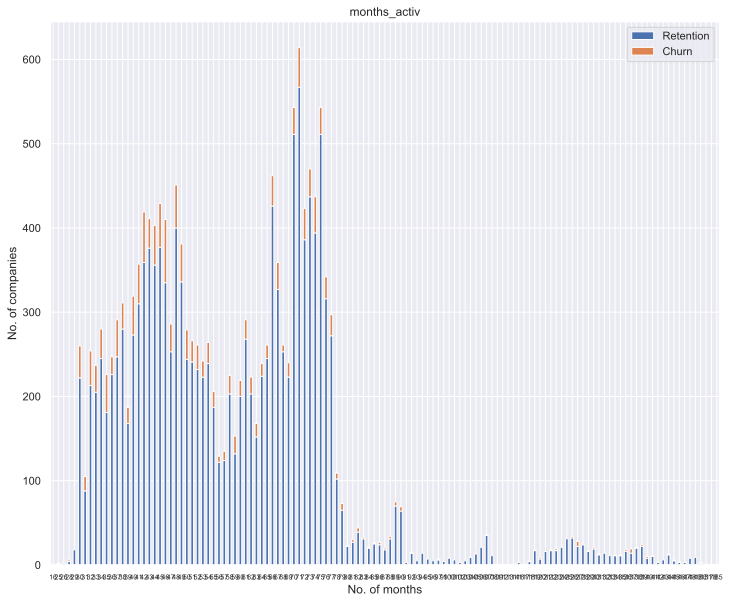

In [37]:
plot_churn_by_month(train, "months_activ", 7)

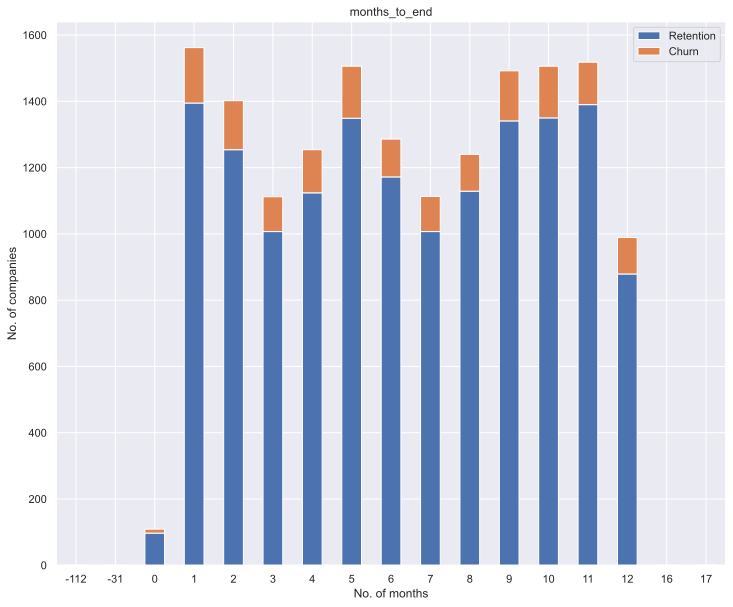

In [38]:
plot_churn_by_month(train, "months_to_end")

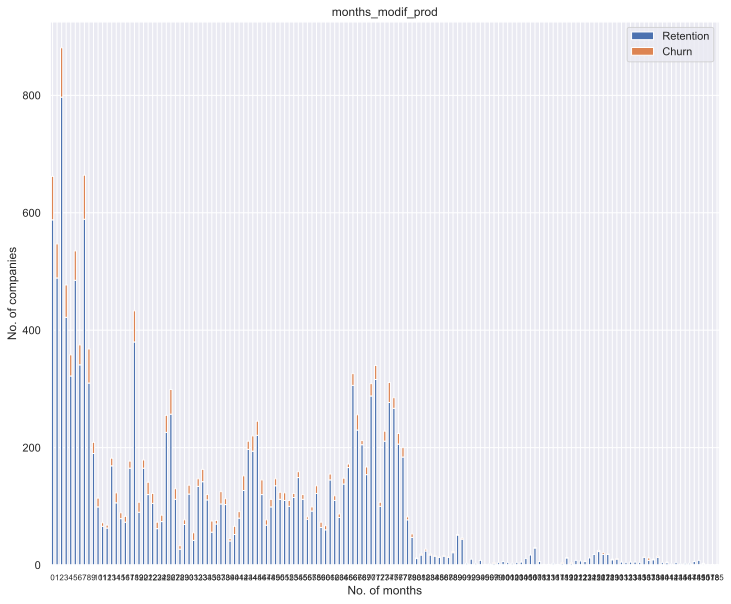

In [39]:
plot_churn_by_month(train, "months_modif_prod", 8)

### 2. Variable Correlations

In [40]:
# calculate variable correlations
correlation = train.corr()

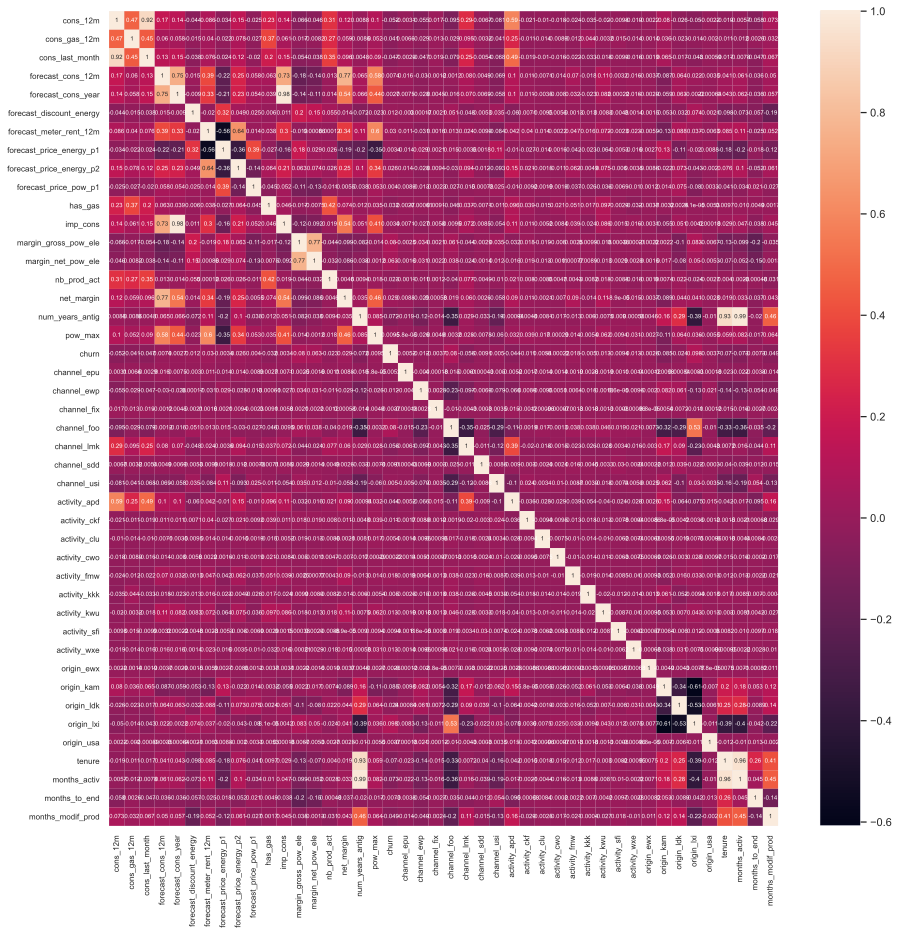

In [41]:
# plot correlation
plt.figure(figsize=(15,15))

sns.heatmap(correlation, annot=True, annot_kws={'size':6})

#Axis ticks size
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)

plt.show()

As expected `num_years_antig` has a high correlation with `months_activ`.
We can remove the variables with very high correlation.

In [42]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

### Pickling

In [44]:
#store the processed data for further use

pd.to_pickle(train, "processed_data/train_data.pkl")
pd.to_pickle(history_data,"processed_data/history_data.pkl")